In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import model_selection
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import itertools
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

import
random.seed(42)

# Load the dataset with the correct delimiter
data = pd.read_csv(r'/content/sample_data/cardio_train.csv', delimiter=';')
data_copy = data

#check correlations
data_corr = data_copy.drop(columns=['gender', 'cholesterol',
'gluc','smoke','alco','active'])
print(data_corr.corr()['cardio'])

data_target = data['cardio']



#convert age to years so we can interpret it better

data['age'] = data['age'] / 365

# Augment the dataset with a BMI feature
data['BMI'] = data['weight'] / (data['height'] / 100) ** 2

# Convert the gender feature to 0s and 1s
data['gender'] = data['gender'] - 1

# Create the 'good_ap' feature
data['good_ap'] = ((data['ap_hi'] >= 90) & (data['ap_hi'] <= 120) &
                   (data['ap_lo'] >= 60) & (data['ap_lo'] <= 80)).astype(int)

#dropping the label column & id
data = data.drop(columns=['cardio','id','height'])

#one-hot encoding the categorical features & normalizing the numerical features

numerical_features = ['age','weight', 'ap_hi', 'ap_lo', 'BMI']
categorical_features = ['gender', 'cholesterol', 'gluc','smoke',
                        'alco','active', 'good_ap']
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
     ("cat", OneHotEncoder(), categorical_features)
    ])

data = full_pipeline.fit_transform(data)



categorical_feature_names = full_pipeline.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine numerical and categorical feature names
all_feature_names = numerical_features + list(categorical_feature_names)

# Create the DataFrame
transformed_df = pd.DataFrame(data, columns=all_feature_names)

data = transformed_df


# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, data_target, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

id        0.003799
age       0.238159
height   -0.010821
weight    0.181660
ap_hi     0.054475
ap_lo     0.065719
cardio    1.000000
Name: cardio, dtype: float64
            age    weight     ap_hi     ap_lo       BMI  gender_0  gender_1  \
47339  0.975641  0.402504  0.007679 -0.035180  1.013875       1.0       0.0   
67456 -1.115365 -0.292150  0.072610 -0.035180 -0.145080       0.0       1.0   
12308  0.672467  1.236089  0.137541  0.017879  0.464682       0.0       1.0   
32557  1.579556  0.124642 -0.057251 -0.077627 -0.355100       0.0       1.0   
664    0.329168 -0.986804 -0.057251 -0.088238 -0.676194       1.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
37194 -1.405568  0.055177  0.137541 -0.088238 -0.263476       0.0       1.0   
6265   1.515922 -0.083754  0.202472 -0.035180  0.042579       0.0       1.0   
54886  1.669941 -0.014288 -0.057251 -0.088238 -0.270387       1.0       0.0   
860   -0.503343 -0.292150 -0.057251 -0.088238 -0

here is the list of all of the column names: Index(['age', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'gender_0', 'gender_1',
       'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2',
       'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1', 'active_0',
       'active_1', 'good_ap_0', 'good_ap_1'],
      dtype='object')
DecisionTree F1 Score: 0.7305650498145589
DecisionTree Accuracy: 0.7353571428571428
RandomForest F1 Score: 0.7235320618711517
RandomForest Accuracy: 0.737
Best parameters for the model with best F1 score: {'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 2}
Best parameters for the model with best accuracy: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


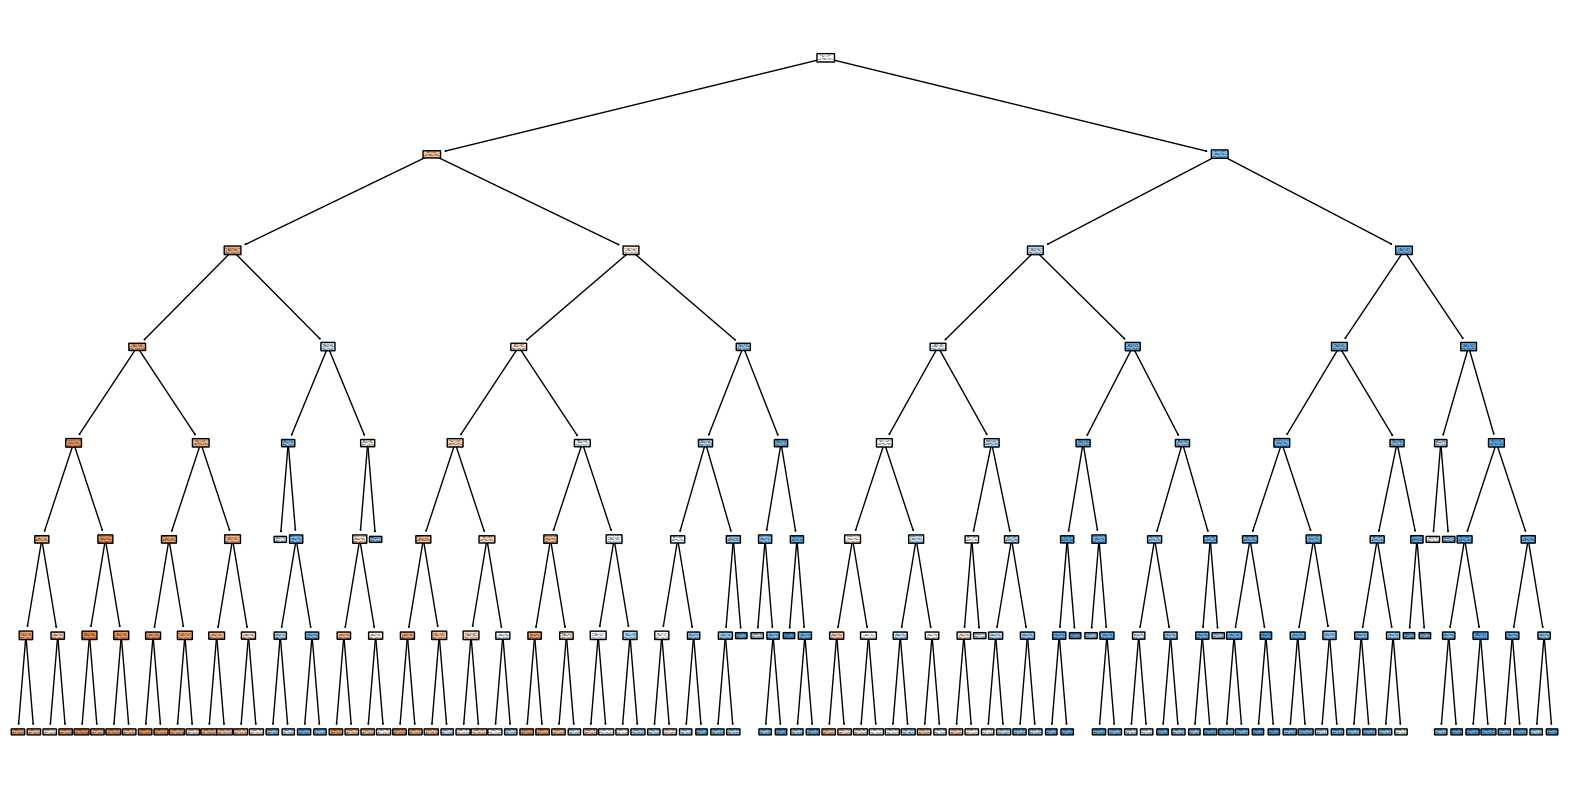

In [ ]:
# Trying different models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42)
}

# Grid search parameters
param_grid = {
    "DecisionTree": {
        'max_depth': [3, 7],
        'min_samples_split': [2],
        'min_samples_leaf': [1, 30, 40,20]
    },
    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
       'min_samples_split': [2, 5, 10]
    }
}


best_model = None
best_f1 = 0
best_accuracy = 0

print('here is the list of all of the column names:', data.columns)
for model_name in models:
    clf = GridSearchCV(models[model_name], param_grid[model_name], scoring='f1', cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} Accuracy: {accuracy}")
    if f1 > best_f1:
        best_f1 = f1
        best_model_f1 = clf
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model_accuracy = clf

# Print the best parameters for the best models
print(f"Best parameters for the model with best F1 score: {best_model_f1.best_params_}")
print(f"Best parameters for the model with best accuracy: {best_model_accuracy.best_params_}")


# Train a Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

best_dt_model = best_model_f1.best_estimator_ if isinstance(best_model_f1.best_estimator_, DecisionTreeClassifier) else best_model_accuracy.best_estimator_


plt.figure(figsize=(20,10))
plot_tree(best_dt_model, feature_names=all_feature_names, filled=True, rounded=True, class_names=['No Cardio', 'Cardio'])

#plot_tree(decision_tree, feature_names=numerical_features + list(best_model_accuracy.best_estimator_['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)), filled=True, rounded=True, class_names=['No Cardio', 'Cardio'])
plt.show()

In [ ]:

#print(f"Best Model: {best_model_accuracy.named_steps['classifier'].best_estimator_}")
#print(f"Best F1 Score: {best_f1}")
#print(f"Best Accuracy: {best_accuracy}")

print(f"Best parameters for the Random Forest model: {best_model_accuracy.best_params_}")

# Correctly accessing the best estimator
print(f"Best Model by F1 Score: {best_model_f1.best_estimator_}")
print(f"Best F1 Score: {best_f1}")
print(f"Best Model by Accuracy: {best_model_accuracy.best_estimator_}")
print(f"Best Accuracy: {best_accuracy}")

# Detailed classification report for the best F1 score model
print("\nClassification report for the best F1 score model:")
y_pred = best_model_f1.predict(X_test)
print(classification_report(y_test, y_pred))

# Detailed classification report for the best accuracy model
print("\nClassification report for the best accuracy model:")
y_pred = best_model_accuracy.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters for the Random Forest model: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Model by F1 Score: DecisionTreeClassifier(max_depth=7, min_samples_leaf=30, random_state=42)
Best F1 Score: 0.7305650498145589
Best Model by Accuracy: RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)
Best Accuracy: 0.737

Classification report for the best F1 score model:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      6988
           1       0.75      0.72      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000


Classification report for the best accuracy model:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.76      0.69      0.72      7012

  

In [ ]:
from sklearn import model_selection

# Adding k-fold cross-validation for the Decision Tree model
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
decision_tree_cv = DecisionTreeClassifier(max_depth=7, min_samples_leaf=30, min_samples_split=2, random_state=42)
cv_results = model_selection.cross_val_score(decision_tree_cv, data, data_target, cv=kfold, scoring='accuracy')
print(f"Decision Tree 10-fold cross-validation accuracy: {cv_results.mean()}")

random_forest_cv = RandomForestClassifier(n_estimators= 200, max_depth= 10, min_samples_split= 10, random_state=42)
cv_results = model_selection.cross_val_score(random_forest_cv, data, data_target, cv=kfold, scoring='accuracy')
print(f"Random Forest 10-fold cross-validation accuracy: {cv_results.mean()}")


Decision Tree 10-fold cross-validation accuracy: 0.7308142857142857
Random Forest 10-fold cross-validation accuracy: 0.7339142857142857
DecisionTree 10-fold cross-validation accuracy: 0.6315
RandomForest 10-fold cross-validation accuracy: 0.7103999999999999
